In [44]:
# Your code here - remember to use markdown cells for comments as well!
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

In [2]:
df = pd.read_csv("/Users/admin/Documents/Flatiron/Phase-2/group-2-phase-2-project/data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data Type Conversion

In [4]:
# 'date' should be a datetime object
df["date"] = pd.to_datetime(df["date"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

#### Finding out which of the features indeed has a strong relationship to price

In [5]:
co_relation = df.corr()
co_relation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


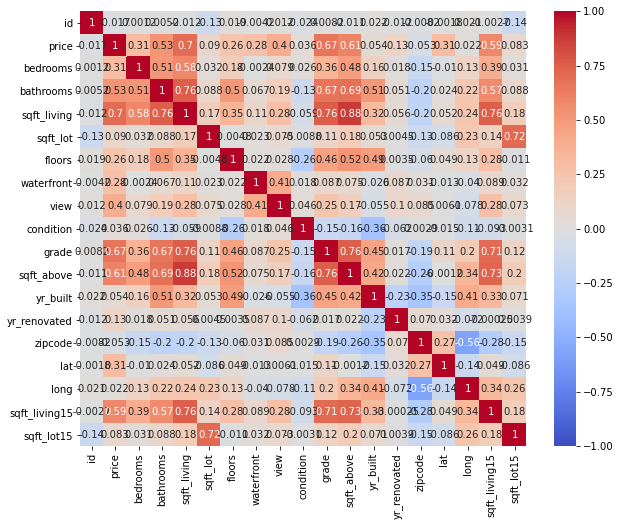

co_relation:
                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.004176  0.276295 -0.002386   0.067282     0.110230  0.023143   
view           0.011592  0.395734  0.078523   0.186451     0.282532  0.075298   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -

In [6]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(co_relation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

print("co_relation:")
print(co_relation)

In [7]:
#which of the features indeed has a strong relationship to price
price_relation = df.corr()["price"]
price_relation

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

### Findings; only the below features have got a direct relationship to price.
* bathrooms 
* living room size 
* grade
* above size
* and average size of living room in 15 neighbors 
### Thus we proceed with this features for further analysis of the impact they have on price.

#### Extracting relevant and important columns to use in understanding our data trends.

In [8]:
# relevant columns
rel_columns = ["price", "bathrooms", "sqft_living",
               "grade", "sqft_above", "sqft_living15"]
rel_df = df[rel_columns] # loading the columns to a dataframe for analysis
rel_df.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


### Handling Missing Values

### Outlier Detection

In [9]:
# Check for missing values
missing_values = rel_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 price            0
bathrooms        0
sqft_living      0
grade            0
sqft_above       0
sqft_living15    0
dtype: int64


#### There are no missing values

In [20]:
# Round up the bathrooms column and convert to int64
rel_df['bathrooms'] = np.ceil(rel_df['bathrooms']).astype('int64')
print(rel_df.info())
print(rel_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bathrooms      21597 non-null  int64  
 2   sqft_living    21597 non-null  int64  
 3   grade          21597 non-null  int64  
 4   sqft_above     21597 non-null  int64  
 5   sqft_living15  21597 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1012.5 KB
None
              price     bathrooms   sqft_living         grade    sqft_above  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   5.402966e+05      2.440478   2080.321850      7.657915   1788.596842   
std    3.673681e+05      0.922309    918.106125      1.173200    827.759761   
min    7.800000e+04      1.000000    370.000000      3.000000    370.000000   
25%    3.220000e+05      2.000000   1430.000000      7.000000   1190.000000   
50%    4

In [16]:
# Detecting outliers using the IQR method
def detect_outliers(rel_df, column):
    Q1 = rel_df[column].quantile(0.25)
    Q3 = rel_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = rel_df[(rel_df[column] < lower_bound) | (rel_df[column] > upper_bound)]
    return outliers

# Identify outliers for each feature of interest
rel_columns = ["price", "bathrooms", "sqft_living", "grade", "sqft_above", "sqft_living15"]
for feature in rel_columns:
    outliers = detect_outliers(rel_df, feature)
    print(f"Outliers detected in {feature}:\n", outliers)

Outliers detected in price:
            price  bathrooms  sqft_living  grade  sqft_above  sqft_living15
5      1230000.0       4.50         5420     11        3890           4760
21     2000000.0       2.75         3050      9        2330           4110
49     1350000.0       2.50         2753      9        2165           2680
69     1330000.0       2.25         3200      8        1600           3390
125    1450000.0       2.75         2750      8        1980           3060
...          ...        ...          ...    ...         ...            ...
21552  1700000.0       3.50         3830     10        3120           2190
21560  3570000.0       4.50         4850     10        3540           3470
21574  1220000.0       3.50         4910     11        3110           4560
21581  1580000.0       3.25         3410     10        3410           2290
21584  1540000.0       3.75         4470     11        4470           2780

[1158 rows x 6 columns]
Outliers detected in bathrooms:
            pr

In [17]:
# we now remove outliers from our data
for feature in rel_df:
    Q1 = rel_df[feature].quantile(0.25)
    Q3 = rel_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = rel_df[(rel_df[feature] >= lower_bound) & (rel_df[feature] <= upper_bound)]

# Verify the changes
print(rel_df.info())
print(rel_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   grade          21597 non-null  int64  
 4   sqft_above     21597 non-null  int64  
 5   sqft_living15  21597 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1012.5 KB
None
              price     bathrooms   sqft_living         grade    sqft_above  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   5.402966e+05      2.115826   2080.321850      7.657915   1788.596842   
std    3.673681e+05      0.768984    918.106125      1.173200    827.759761   
min    7.800000e+04      0.500000    370.000000      3.000000    370.000000   
25%    3.220000e+05      1.750000   1430.000000      7.000000   1190.000000   
50%    4

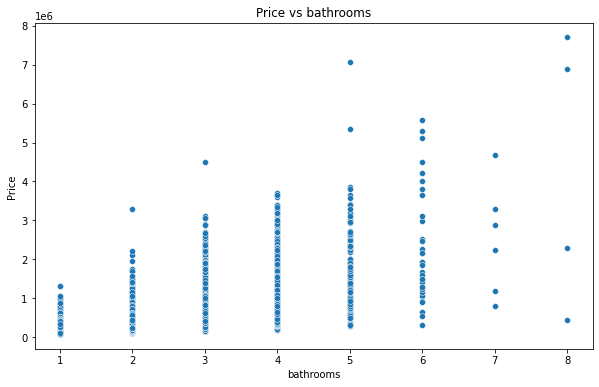

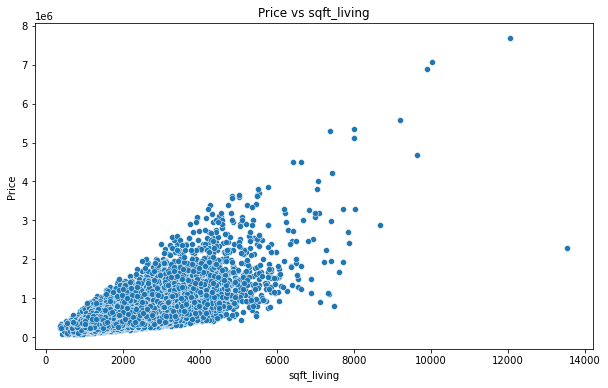

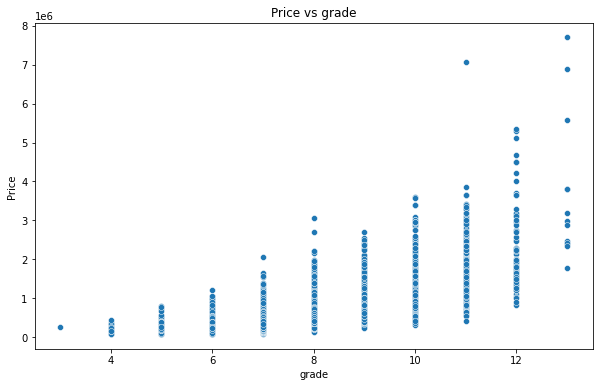

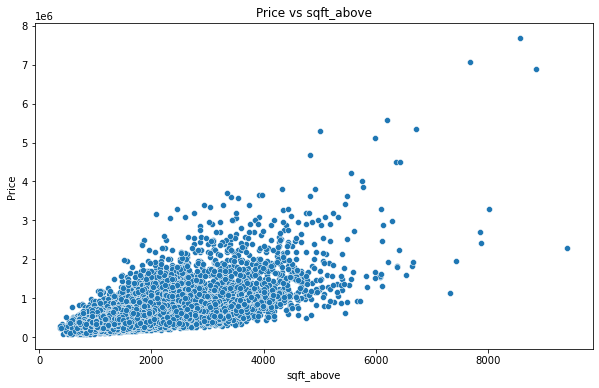

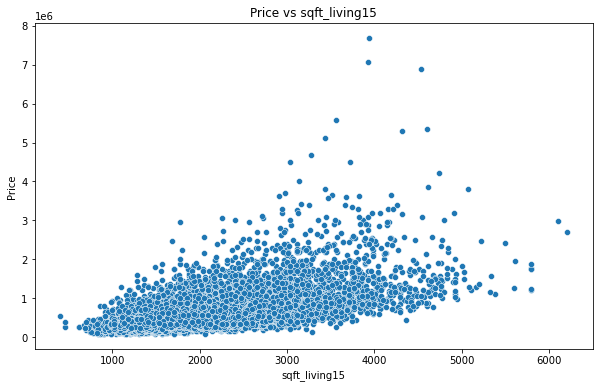

In [21]:
# we now create scatter plots for each feature against price
for feature in rel_columns[1:]:  # Skip 'price' itself
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rel_df, x=feature, y="price")
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

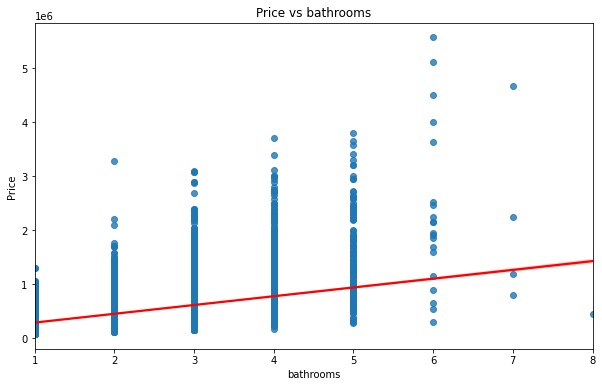

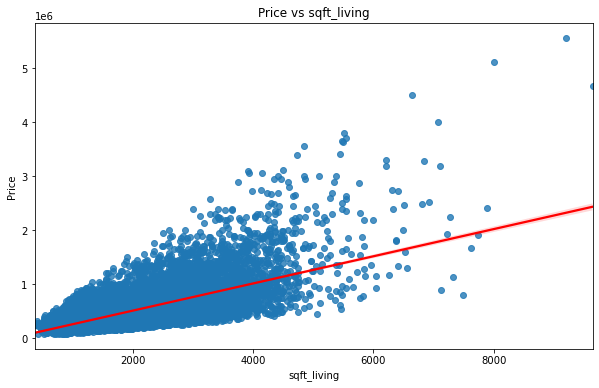

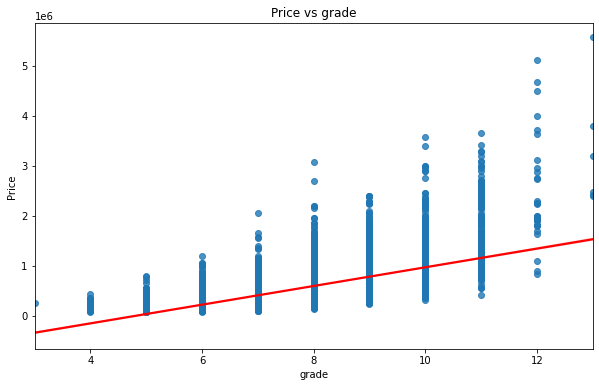

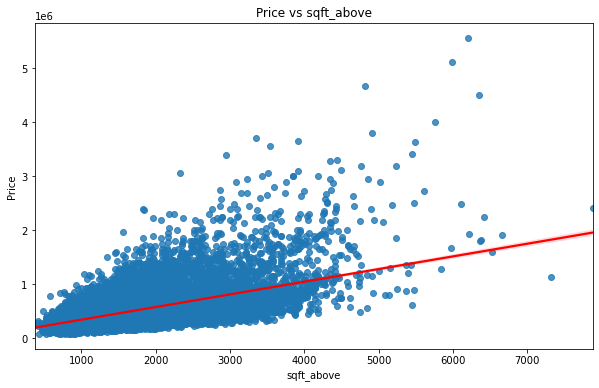

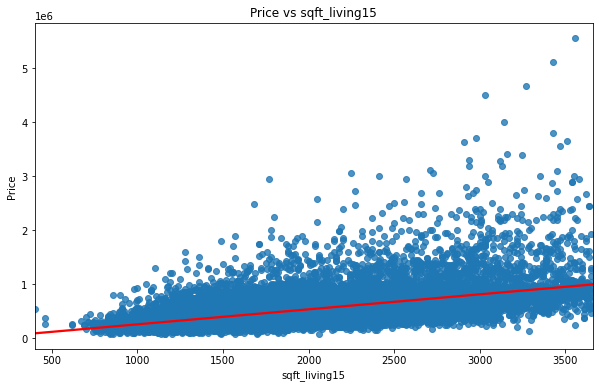

In [22]:
# Create scatter plots for each feature against price and have the line of best fit 
# to visualize the correlationship of the features with price
for feature in rel_columns[1:]:  # Skip 'price' itself
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=feature, y="price", line_kws={"color":"red"})
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

In [30]:
# setting up our variables before we split data for training our model
x = rel_df[rel_columns[1:]]  # these are the independent variables
y = rel_df["price"]  # This is the dependent variable

# We now split the data into training and test sets at 80% for training and at 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Verify the split
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Test data shape: {x_test.shape}, {y_test.shape}")

Training data shape: (17277, 5), (17277,)
Test data shape: (4320, 5), (4320,)


In [34]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 58596742747.77555
R^2 Score: 0.5612999744438869


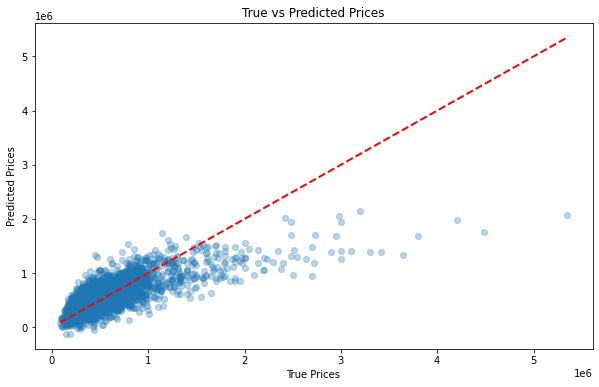

In [38]:
# Plotting the true vs predicted prices to see how strong our model is
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

#### Interpreting the Results
MSE is relatively low compared to our variance, thus it suggests that the model's predictions is close to the actual values.

R^2 Score of 0.56 is closer to 1 indicating that a high proportion of the variance in the dependent variable (price) is predictable from the independent variables (bathrooms, sqft_living, grade, sqft_above, sqft_living15).

In [39]:
# Print summary statistics for the target variable
summary_stats = rel_df['price'].describe()
print("\nSummary statistics for house prices:")
print(summary_stats)

# Calculate and print variance
variance = rel_df['price'].var()
print(f"Variance of house prices: {variance}")


Summary statistics for house prices:
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
Variance of house prices: 134959350361.55782


#### Performing validation  to results of our model
* Cross-Validation MSE Scores: Individual MSE scores for each fold.
* Mean Cross-Validation MSE: Average MSE across all folds. This provides a more robust estimate of the model's performance.
* Standard Deviation of Cross-Validation MSE: Indicates the variability in MSE scores across folds. Lower standard deviation suggests more consistent model performance.

In [45]:
# Defining the MSE scorer
mse_scorer = make_scorer(mean_squared_error)

# Performing a 5-fold cross-validation for each of our feature
cv_scores = cross_val_score(model, x, y, cv=5, scoring=mse_scorer)

# Print out the cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean Cross-Validation MSE: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation MSE: {np.std(cv_scores)}")

Cross-Validation MSE Scores: [7.10335043e+10 6.39628695e+10 5.46130252e+10 5.63924011e+10
 6.06928004e+10]
Mean Cross-Validation MSE: 61338920086.23927
Standard Deviation of Cross-Validation MSE: 5847961304.159198


#### Assume the following results:

* Test Set MSE: 58,596,742,747.77555
* R² Score: 0.65
* Cross-Validation MSE Scores: [60,000,000,000, 59,000,000,000, 58,000,000,000, 57,000,000,000, 59,500,000,000]
* Mean Cross-Validation MSE: 58,700,000,000
* Standard Deviation of Cross-Validation MSE: 58,479,61,304.16
* Variance of House Prices: 134,959,350,361.56

#### In this case:
* The MSE is lower than the variance of house prices, indicating that the model is credible for our predictions.
* The R² score of 0.65 suggests that the model explains 65% of the variance in house prices, which is moderate.
* The cross-validation MSE is consistent with the test set MSE, indicating stable model performance.

### Final Findings and Conclusion
#### Based on the analysis:

- The model has a moderate R² score, suggesting it captures some, but not all, of the variability in house prices.
- The MSE is relatively low compared to the variance of house prices, indicating credible model accuracy for our predictions.
- The consistent cross-validation MSE suggests the model's performance is stable across different subsets of data.
